11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/10
375/375 [==============================] - 9s 16ms/step - loss: 0.3735 - accuracy: 0.8954 - val_loss: 0.1791 - val_accuracy: 0.9491
Epoch 2/10
375/375 [==============================] - 5s 14ms/step - loss: 0.1530 - accuracy: 0.9543 - val_loss: 0.1436 - val_accuracy: 0.9562
Epoch 3/10
375/375 [==============================] - 4s 10ms/step - loss: 0.1082 - accuracy: 0.9675 - val_loss: 0.1244 - val_accuracy: 0.9657
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0810 - accuracy: 0.9764 - val_loss: 0.1041 - val_accuracy: 0.9691
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0639 - accuracy: 0.9803 - val_loss: 0.1044 - val_accuracy: 0.9698
Epoch 6/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0521 - accuracy: 0.9839 - val_loss: 0.0935 - val_accuracy: 0.9725
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0435

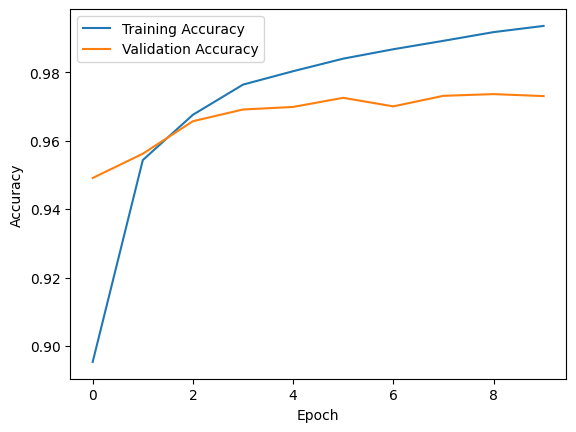

1/1 [==============================] - 0s 91ms/step


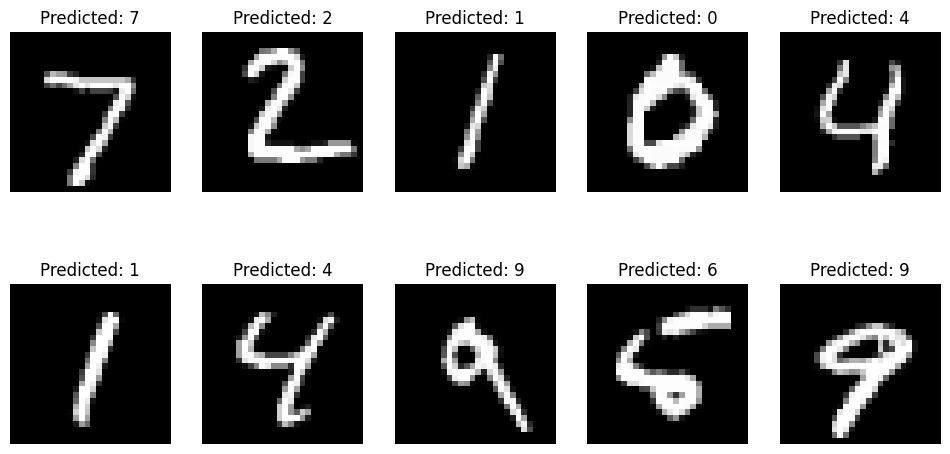

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

X_train = X_train.reshape((-1, 784))
X_test = X_test.reshape((-1, 784))

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy*100:.2f}%")

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

predictions = model.predict(X_test[:10])
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis('off')
plt.show()
